In [1]:
#importing the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the bikes data
df = pd.read_csv('train_bikes.csv')
df.head()  #looking at few top rows of data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Description of datafields
#datetime - hourly date + timestamp  
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
#holiday - whether the day is considered a holiday
#workingday - whether the day is neither a weekend nor holiday
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius
#humidity - relative humidity
#windspeed - wind speed
#casual - number of non-registered user rentals initiated
#registered - number of registered user rentals initiated
#count - number of total rental

Here Target variable is count that is total no. of bikes rented per hours

'''Questions to answers
1) Is the data contain null values? If yes, How to handle them?
2) In which season, total no. of bikes rented is high?
3) Is workingday requiered more no. of bikes rented?
4) Is holiday required less no. of bikes rented?
5) In what type of weather, no. of bikes rented is more?
6) Is high temparature reduce no. of bikes rented?
7) Is humidity reduce no. of bikes rented?
8) Is windspeed decrease the demand of bikes?
9) Is there outliers in data?
'''

In [3]:
#looking at some tail rows of data
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [4]:
#shape of dataset
df.shape

(10886, 12)

# Is the data contain null values? If yes, How to handle them?

In [6]:
df.isnull().sum()  #checking there is any missing value in data

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Balancing the target variable

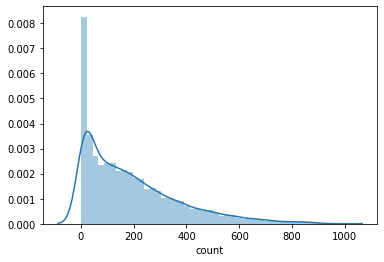

In [9]:
sns.distplot(df['count'],kde=True)

The graph showing that no. of bikes rented is lies b/w (0 to 200).
The graph is right-skewed. Let's balance the target variable.

In [18]:
df['logcount']=np.log(df['count']+1)   #Taking the logirithium transformation of target variable.

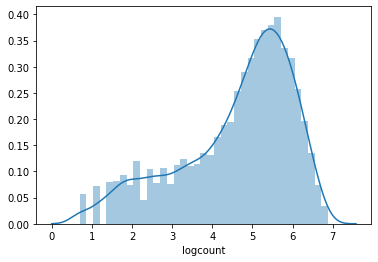

In [19]:
sns.distplot(df['logcount'],kde=True)

This is the balance count variable by taking logirithm transformation.
logcount lie b/w (4 to 7).
We will drop the column count in the end.

# Extract the datetime

In [24]:
#dtypes of columns
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
logcount      float64
dtype: object

In [26]:
df['datetime']=pd.to_datetime(df['datetime'])

In [27]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
logcount             float64
dtype: object

In [28]:
df['year']=df['datetime'].dt.year

In [29]:
df['month']=df['datetime'].dt.month

In [31]:
df['day']=df['datetime'].dt.dayofweek

In [32]:
df['hours']=df['datetime'].dt.hour

In [33]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
logcount             float64
year                   int64
month                  int64
day                    int64
hours                  int64
dtype: object

Now we don't need datetime columns. So we drop it.

In [34]:
df.drop('datetime',axis=1,inplace=True)

# In which season, total no. of bikes rented is high?

In [40]:
df.groupby('season')['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

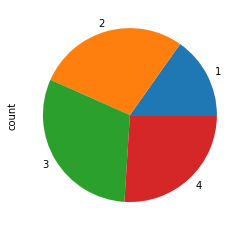

In [36]:
df.groupby('season')['count'].mean().plot.pie()

Season 3 rented more no. of bike followed by 2 and 4.
fall season required more no. of bikes rented.

# Is workingday requiered more no. of bikes rented?

In [41]:
df['workingday'].value_counts()  #there are more no. of working day

1    7412
0    3474
Name: workingday, dtype: int64

In [42]:
df.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

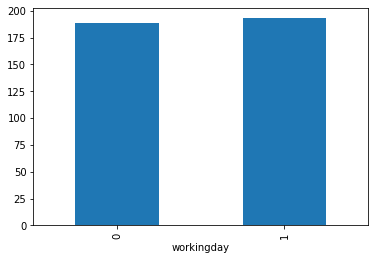

In [43]:
df.groupby('workingday')['count'].mean().plot.bar()

At working day, requierement of bike is little higher as compared to non-working day.
I think it is happen beacause on the working day people travel more.

# Is holiday required less no. of bikes rented?

In [44]:
df['holiday'].value_counts()  #There are less no. of holiday.

0    10575
1      311
Name: holiday, dtype: int64

In [45]:
df.groupby('holiday')['count'].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

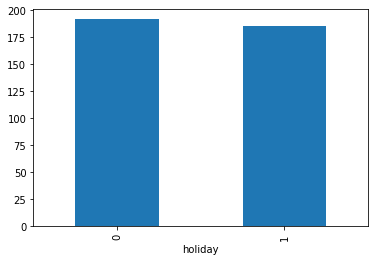

In [46]:
df.groupby('holiday')['count'].mean().plot.bar()

A very little difference b/w count on holiday and non-holiday.
The requirement of bike on non-holiday is more than that of holiday.
It may happen Because on holiday, people like to stay at home and not to travel.

# In what type of weather, no. of bikes rented is more?

In [47]:
df['weather'].value_counts()  #There are more frequent weather is Clear, Few clouds, Partly cloudy, Partly cloudy
                              # And Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog like weather comes
                              # only on a single day 

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [48]:
df.groupby('weather')['count'].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

I am surprised to see that requirement of bike is also on weather category 4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog). Let's see what is the day on which this weather occur.

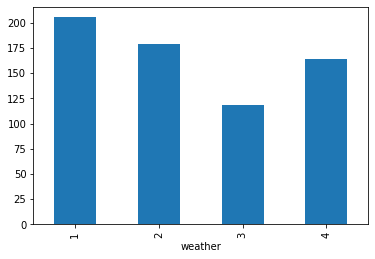

In [49]:
df.groupby('weather')['count'].mean().plot.bar()

This barplot showing that weather category 1 has required more no. of bike followed by 2 and 4.

In [50]:
df[df['weather']==4]  # There are 164 bikes required on that day.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,logcount,year,month,day,hours
5631,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,5.105945,2012,1,0,18



# Is high temparature reduce no. of bikes rented?

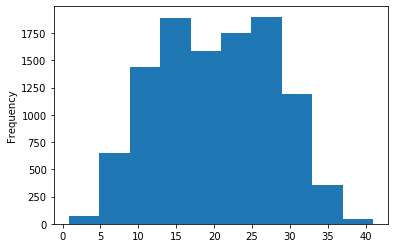

In [51]:
df['temp'].plot.hist()

There are temparature ranging from 10 to 30 celcius is more frequent.

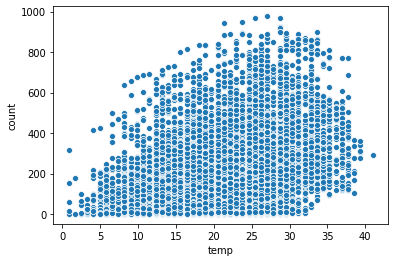

In [52]:
sns.scatterplot(df['temp'],df['count'])

From scatterplot, we see that count is slightly increase as temp increase.
And there are more no. of bike required on temp ranging in (15,30)

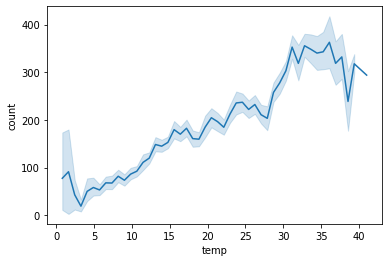

In [54]:
sns.lineplot(df['temp'],df['count'])

This lineplot is also showing that as temp increase, no. of bkes requirement is also increase.
So hypothesis that high temp reduct bikes requirement is false.

# Is humidity reduce no. of bikes rented?

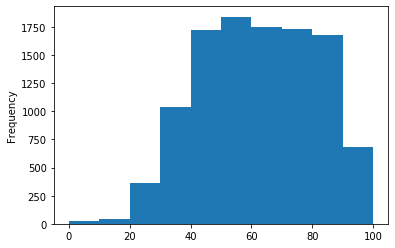

In [55]:
df['humidity'].plot.hist()

Humidity is most frequent in the range (40,90).
Humidity is high b/w 50 to 60.

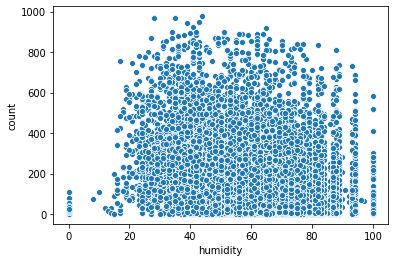

In [56]:
sns.scatterplot(df['humidity'],df['count'])

This scatterplot showing that increase in humidity slightly cause increase in bikes requirement.
bikes requirement start increasing suddenly when humidity is 20.

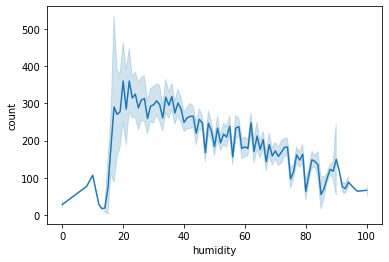

In [58]:
sns.lineplot(df['humidity'],df['count'])

This lineplot is also showing the same thing. count variable suddenly start increasing when humidity is 20
So the hypothesis that humidity decrease bikes requirement is false.

# Is windspeed decrease the demand of bikes?

In [59]:
df['windspeed'].nunique()

28

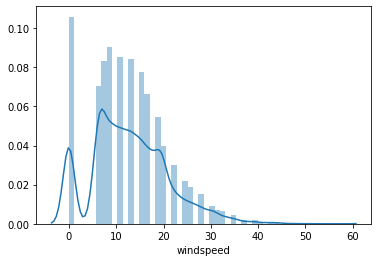

In [64]:
sns.distplot(df['windspeed'],kde=True)

Distplot is showing that windspeed on mostly zero followed by range (6 to 20).
Distribution of windspeed is not uniform.

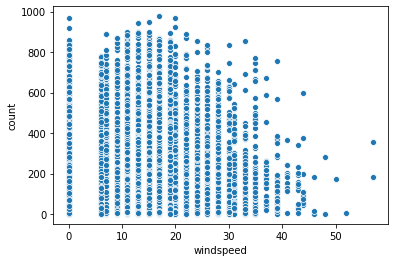

In [60]:
sns.scatterplot(df['windspeed'],df['count'])

The scatterplot showing that there are more no. of bikes required on 0 windspeed.


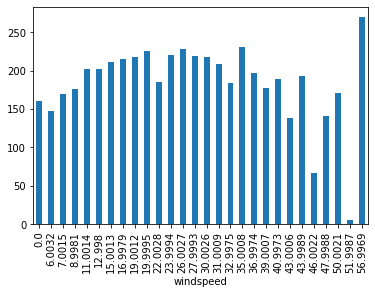

In [73]:
df.groupby('windspeed')['count'].mean().plot.bar()

There are more requirement of bikes on windspeed 56.99.
The hypothesis that high windspeed decrease demand of bikes is false.


# Outlier treatment

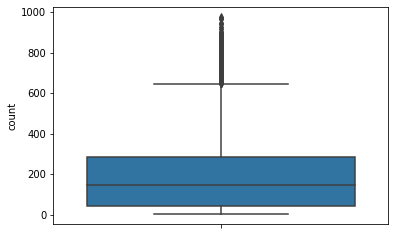

In [77]:
sns.boxplot(y='count',data=df)

There are outlier present in the count variable that is shown in boxplot.
The count variable more than 647 is an outlier.
I think these outliers are not by mistake. There may be some day where requirement of bikes is very high.
So we cap them.
Let's find no. of outliers

In [91]:
x=(df[df['count'] >647.0]).shape[0]
y=(df[df['count']<=647.0]).shape[0]
(x/(x+y))*100

2.75583318023149

There is 2.75% outlier in count variable

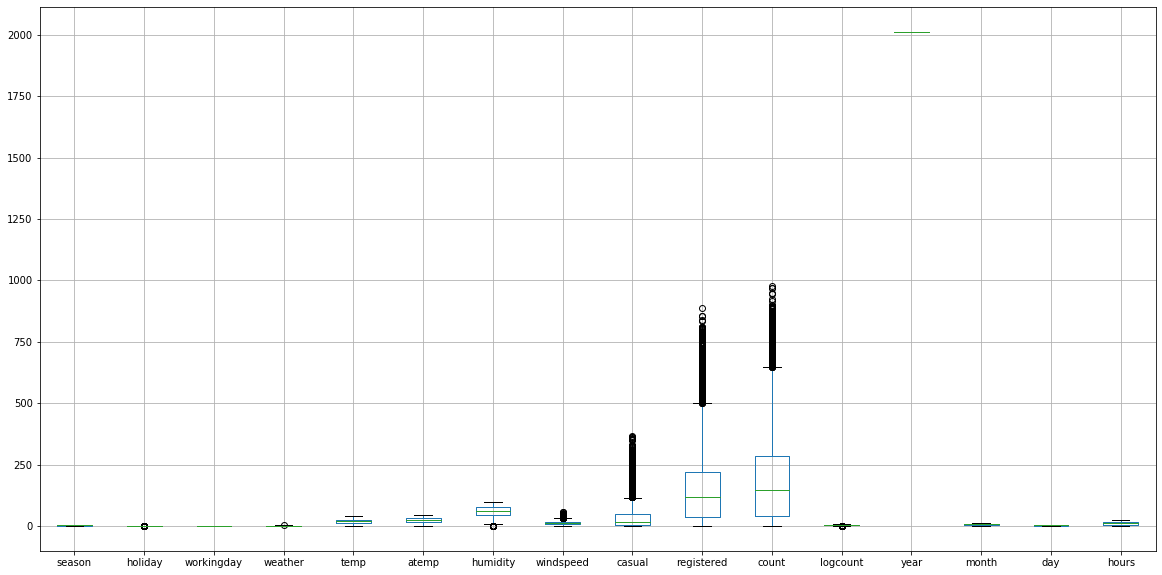

In [99]:
df.boxplot(figsize=(20,10))

The variable windspeed, casual , registered, count containg the outlier.

Now i thing we don't required casual and registered. Because they are help us in predicting the count variable.

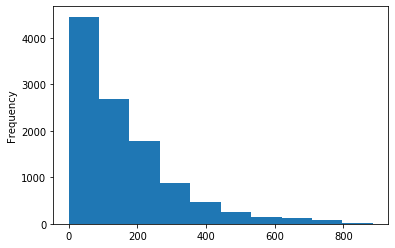

In [101]:
 df['registered'].plot.hist()

The registered user are more frequent in range(0,250)

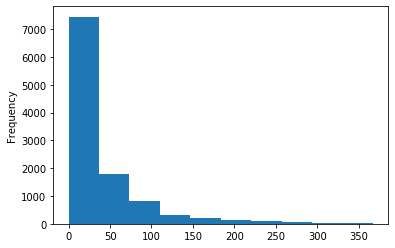

In [102]:
df['casual'].plot.hist()

casual user more frequent in range(0,75)
And there are more no. of registered user.

In [103]:
df.drop(['registered','casual'],axis=1,inplace=True)

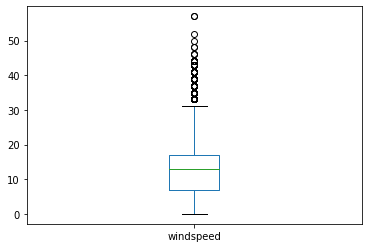

In [104]:
#handling outlier in windspeed
df['windspeed'].plot.box()

There are outlier present in windspeed. The windspeed greater than 31.99 is an outlier.
We can handle it by imputation.

In [107]:
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1
Q3+1.5*IQR

31.992500000000003

In [112]:
df.loc[df['windspeed']>31.99, 'windspeed']=np.mean(df['windspeed'])

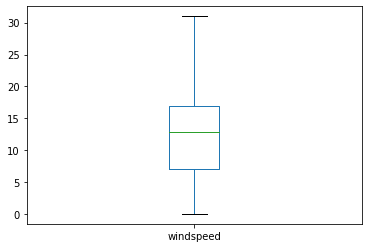

In [113]:
df['windspeed'].plot.box()

Yes it is now containing no outliers

#  In which year, demand of bikes is more?

In [114]:
df.groupby('year')['count'].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

There are more average of bikes is needed in year 2012

#  In which month, demand of bikes is more?

In [115]:
df.groupby('month')['count'].mean()

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

In the month of jun, there is more requirement of bikes

#  In which dayofweek, demand of bikes is more?

In [116]:
df.groupby('day')['count'].mean()

day
0    190.390716
1    189.723847
2    188.411348
3    197.296201
4    197.844343
5    196.665404
6    180.839772
Name: count, dtype: float64

There is more no. of bikes required on day no. 3,4 and 5.

#  In which time, demand of bikes is more?

In [118]:
df.groupby('hours')['count'].mean()

hours
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

The bike requirement is more on morning 8:00 AM.
The bike requirement is more on evening 4:00PM,5PM,6PM,7PM.
The bike requirement is very less on morning 4AM.

Now we don't need count variable. Because we are considering it log Transformation.


In [119]:
df.drop('count',axis=1,inplace=True)

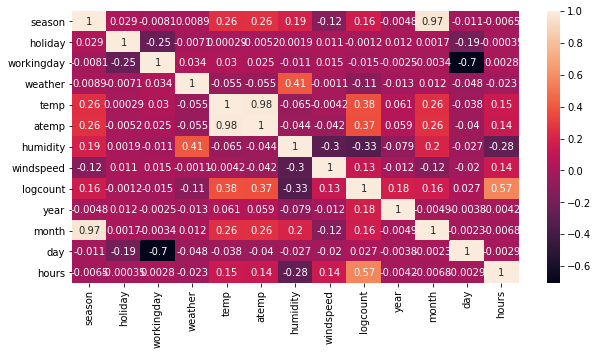

In [126]:
#Look at correlation of data
figdims = (10,5)
fig,ax = plt.subplots(figsize=figdims)
sns.heatmap(df.corr(),annot=True,ax=ax)

temp and atemp has correlation of 0.98 (so we can drop one of them),
month and season has correlation of 0.97 (so we can drop month),
day and workingday have correlation of -0.7 mean if day no. is increasing than there is less probability that it is working day.,
humidity and weather have correlation of 0.47,
hours and logcount have correlation of 0.57, say that if increase in time than there is also an increment of logcount.

In [127]:
df.drop(['atemp','month'],axis=1,inplace=True)

## End